In [4]:
# load in images
# test 
import numpy as np
import io
import torch
import torch.nn as nn
import math
from collections import OrderedDict
import torchvision.transforms as transforms
from PIL import Image
import os

In [5]:
# Create dictionary to labels
label_dict = {}
with open('./data/1/morph_all_label.txt') as f:
    for line in f:
        (key, val) = line.split()
        label_dict[key] = val

# Create dictionary to labels 2 - temporary, combine later
label_dict_2 = {}
with open('./data/1/morph_all_label.txt') as f:
    for line in f:
        (key, val) = line.split()
        label_dict[key] = val


In [6]:
def read_img(root, filedir, transform=None):
    # Data loading
    with open(filedir, 'r') as f:
        lines = f.readlines()  
    output = []    
    for line in lines:
        linesplit = line.split('\n')[0].split(' ')
        #print(linesplit)
        addr = linesplit[0]
        target = torch.Tensor([float(linesplit[1])])
        img = Image.open(os.path.join(root, addr)).convert('RGB')

        if transform is not None:
            img = transform(img)
        
        output.append([img, target])

    return output

In [4]:
root = './data/morph2'
valdir = './data/1/test2morph.txt'

In [7]:
import random

import cv2
from matplotlib import pyplot as plt

#ÍBS: I need this for my kernel not to die
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [8]:
#Lesa inn myndir úr directory og skrifa þær í byrjun inn í nýtt directory 

folder_dir = './data/morph_all_2'
for images in os.listdir(folder_dir):
 
    # check if the image/file ends with png
    if (images.endswith(".png")):
        print(images)

image100.png
image101.png
image102.png
image103.png
image104.png
image105.png
image106.png
image107.png
image108.png
image109.png
image110.png
image111.png
image112.png
image113.png
image114.png
image115.png
image116.png
image117.png
image118.png
image119.png
image120.png
image61.png
image62.png
image63.png
image64.png
image65.png
image66.png
image67.png
image68.png
image69.png
image70.png
image71.png
image72.png
image73.png
image74.png
image75.png
image76.png
image77.png
image78.png
image79.png
image80.png
image81.png
image82.png
image83.png
image84.png
image85.png
image86.png
image87.png
image88.png
image89.png
image90.png
image91.png
image92.png
image93.png
image94.png
image95.png
image96.png
image97.png
image98.png
image99.png


In [21]:
counter = 0
file = open("./data/augment/information.txt", "w")
file_labels = open("./data/augment/image_label_mapping.txt", "w")
for images in os.listdir(folder_dir):
    if (images.endswith(".png")):
        counter = counter + 1
        path = './data/morph_all/'+images
        image_import = cv2.imread(path)
        image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
        #visualize(image_raw)
        
        # Flip image horizontally - do this to all photos
        transform = A.HorizontalFlip(p=1)
        #random.seed(1)
        augmented_image = transform(image=image_raw)['image']
        augment = 'horizontal' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #result=cv2.imwrite(path_augment, augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        #if result==True:
        #  print('File saved successfully')
        #else:
        #  print('Error in saving file')
        #visualize(augmented_image)
    
        transform = A.Blur(blur_limit=5,always_apply=True)
        #random.seed(2) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur5' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # Blur image limit 15
        transform = A.Blur(blur_limit=10,always_apply=True)
        #random.seed(3)
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur15' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        #Add random contrast to each image
        transform = A.RandomContrast(limit=0.7, always_apply=True, p=1)
        random.seed(203) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'randomcontrast' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # add gaussian noise to every image
        transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
        #random.seed(4) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gaussian' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # To grey
        transform = A.ToGray(always_apply=True, p=0.9)
        #random.seed(5) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gray' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # Hue Saturation
        transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
        random.seed(57) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'saturation' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        #Tilt both ways for each image and each augmentation
        transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(100)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(102)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(400) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-horizontal' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(401) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-horizontal' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(402) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur5' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(403) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(404) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur10' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(405)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(206) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-randomcontrast' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(407)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-randomcontrast' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(208) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gauss' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(409)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gauss' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(210) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gray' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(411)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gray' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(212) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-hue' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(413)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-hue' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        #visualize(augmented_image)
        #plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
file.close()
file_labels.close()
        
        
        

In [24]:
data = augment_data = ""
  
#Reading data from original data labels
with open("./data/1/morph_all_label.txt") as fp:
    data = fp.read()
    
# Reading data from augmented data labels
with open("./data/augment/image_label_mapping.txt") as fp:
    augment_data = fp.read()

# To add the data of file2
# from next line
data += "\n"
data += augment_data

  
with open ('image_label_mapping.txt', 'w') as fp:
    fp.write(data)
    


KeyError: 'image100.png'

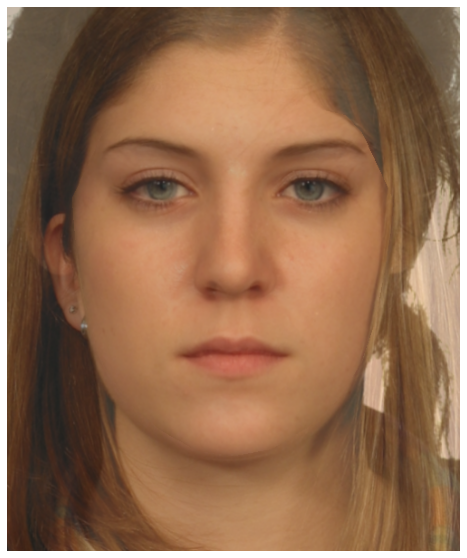

In [9]:
counter = 0
file = open("./data/augment2/information.txt", "w")
file_labels = open("./data/augment2/image_label_mapping.txt", "w")
for images in os.listdir(folder_dir):
    if (images.endswith(".png")):
        counter = counter + 1
        path = './data/morph_all_2/'+images
        image_import = cv2.imread(path)
        image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
        #visualize(image_raw)
        
        # Flip image horizontally - do this to all photos
        transform = A.HorizontalFlip(p=1)
        #random.seed(1)
        augmented_image = transform(image=image_raw)['image']
        augment = 'horizontal' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        #result=cv2.imwrite(path_augment, augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
    
        transform = A.Blur(blur_limit=5,always_apply=True)
        #random.seed(2) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur5' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # Blur image limit 15
        transform = A.Blur(blur_limit=10,always_apply=True)
        #random.seed(3)
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur15' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        #Add random contrast to each image
        transform = A.RandomContrast(limit=0.7, always_apply=True, p=1)
        random.seed(203) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'randomcontrast' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # add gaussian noise to every image
        transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
        #random.seed(4) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gaussian' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # To grey
        transform = A.ToGray(always_apply=True, p=0.9)
        #random.seed(5) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gray' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # Hue Saturation
        transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
        random.seed(57) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'saturation' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        #Tilt both ways for each image and each augmentation
        transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(100)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(102)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(400) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-horizontal' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(401) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-horizontal' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(402) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur5' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(403) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(404) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur10' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(405)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(206) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-randomcontrast' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(407)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-randomcontrast' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(208) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gauss' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(409)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gauss' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(210) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gray' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(411)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gray' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(212) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-hue' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(413)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-hue' + str(counter)
        path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
file.close()
file_labels.close()
        
        
        